In [33]:
# import numpy as np
# import matplotlib.pyplot as plt

# def soft_th(lambda_v, x):
#     return np.sign(x) * np.maximum(np.abs(x) - lambda_v, 0)

# def centralize(X, y, standardize=True):
    
#     X = np.asarray(X)
#     y = np.asarray(y)

#     X_bar = np.mean(X, axis=0)
#     X_centered = X - X_bar

#     X_sd = np.std(X_centered, axis=0)
    
#     if standardize:
#         X_centered /= X_sd

#     y_bar = np.mean(y)
#     y_centered = y - y_bar

#     return {
#         'X': X_centered,
#         'y': y_centered,
#         'X_bar': X_bar,
#         'X_sd': X_sd,
#         'y_bar': y_bar
#     }

# def linear_lasso(X, y, lambda_v=0, eps=0.001):
#     """
#     Performs Lasso regression using coordinate descent.
#     """
#     n, p = X.shape
    
#     res = centralize(X, y)
#     X_processed = res['X']
#     y_processed = res['y']
    
#     beta = np.zeros(p)
    
#     while True:
#         beta_old = np.copy(beta)
        
#         for j in range(p):
#             r = y_processed - np.dot(X_processed[:, np.arange(p) != j], beta[np.arange(p) != j])
            
#             # The term sum(r * X[:, j]) / n in the original document is equivalent to the dot product
#             # of the residual and the j-th column of X, divided by n. Similarly for sum(X[, j] * X[, j]) / n.
#             beta[j] = soft_th(lambda_v, np.dot(r, X_processed[:, j]) / n) / (np.dot(X_processed[:, j], X_processed[:, j]) / n)
            
#         if np.max(np.abs(beta - beta_old)) < eps:
#             break
            
#     beta_restored = beta / res['X_sd']
#     beta_0 = res['y_bar'] - np.sum(res['X_bar'] * beta_restored)
    
#     return {'beta': beta_restored, 'beta_0': beta_0}

# # Data Generation
# np.random.seed(42)
# n_samples = 500
# d_variables = 6

# z1 = np.random.normal(0, 1, n_samples)
# z2 = np.random.normal(0, 1, n_samples)
# epsilon = np.random.normal(0, 1, (n_samples, d_variables))

# X = np.zeros((n_samples, d_variables))
# X[:, :3] = z1[:, np.newaxis] + epsilon[:, :3] / 5
# X[:, 3:] = z2[:, np.newaxis] + epsilon[:, 3:] / 5

# # dataset 1
# y1 = 3 * z1 + 2 * np.random.normal(0, 1, n_samples)

# # dataset2
# y2 = 3 * z1 - 1.5 * z2 + 2 * np.random.normal(0, 1, n_samples)

Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged 

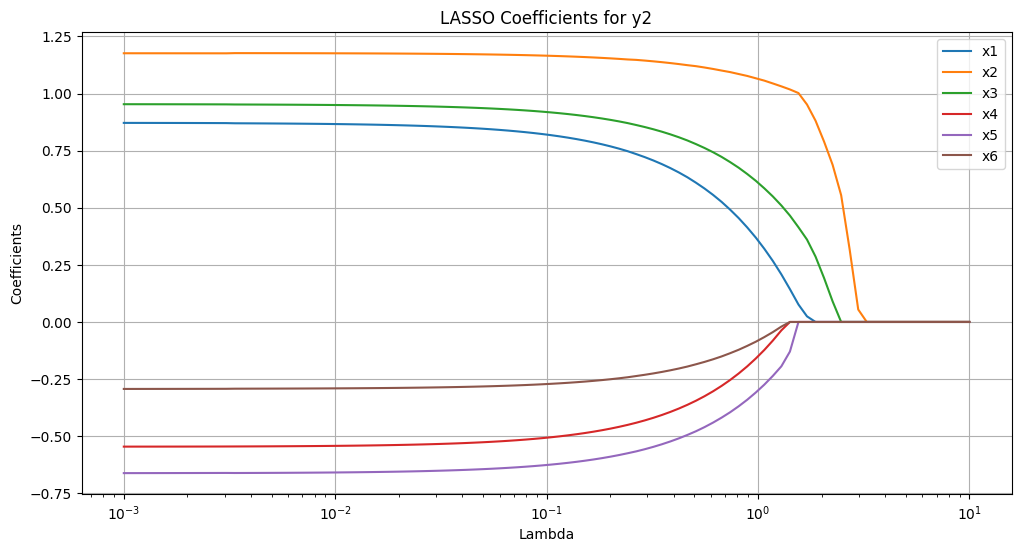

In [34]:
lambda_vals = np.logspace(-3, 1, 100)
coefs2 = np.array([linear_lasso(X, y2, lambda_v=l)['beta'] for l in lambda_vals])

plt.figure(figsize=(12, 6))
for i in range(d_variables):
    plt.plot(lambda_vals, coefs2[:, i], label=f'x{i+1}')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients for y2')
plt.legend()
plt.grid(True)
plt.show()

Data Generation Following Report Specifications
Generated data: n=500, d=6
Case 1: y = 3*z1 + 2*ε (features 1-3 should be important)
Case 2: y = 3*z1 - 1.5*z2 + 2*ε (all features should be important)

Case 1 Analysis
------------------------------
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 84 iterations
Converged after 83 iterations
Converged after 82 iterations
Converged after 67 iterations


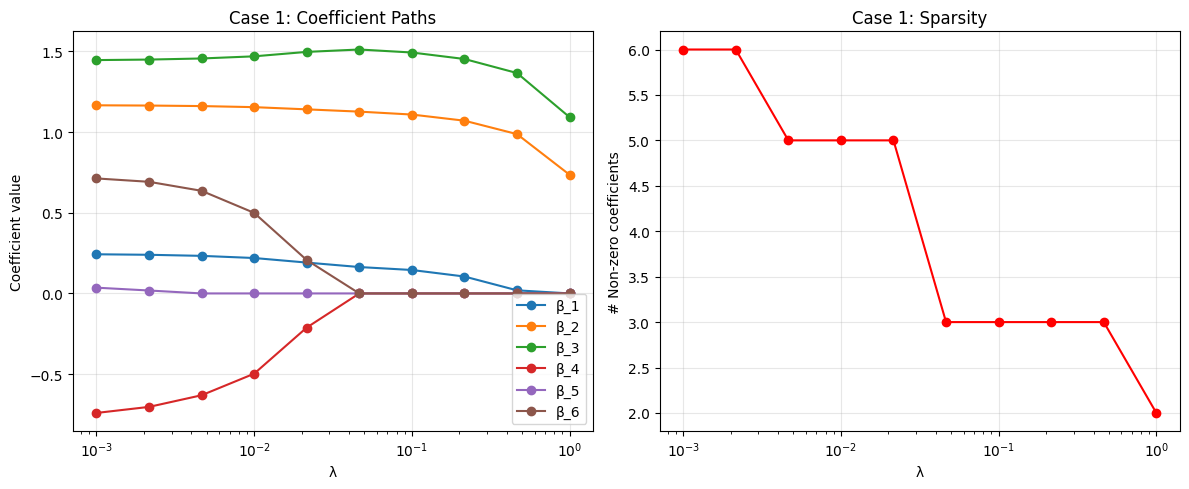

Key λ values:
λ=0.005: [ 0.233,  1.161,  1.456, -0.631,  0.000,  0.636], non-zero: 5
λ=0.046: [ 0.164,  1.127,  1.512, -0.000, -0.000,  0.000], non-zero: 3
λ=0.464: [ 0.019,  0.987,  1.366, -0.000, -0.000, -0.000], non-zero: 3

Case 2 Analysis
------------------------------
Converged after 84 iterations
Converged after 84 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 83 iterations
Converged after 82 iterations
Converged after 79 iterations


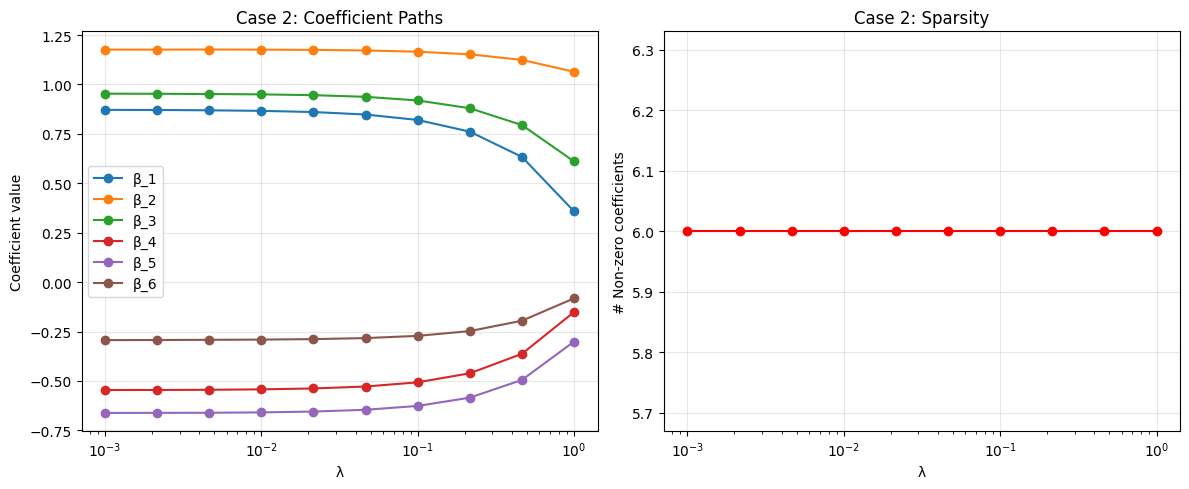

Key λ values:
λ=0.005: [ 0.869,  1.177,  0.952, -0.545, -0.661, -0.292], non-zero: 6
λ=0.046: [ 0.848,  1.172,  0.937, -0.528, -0.646, -0.283], non-zero: 6
λ=0.464: [ 0.633,  1.124,  0.795, -0.363, -0.495, -0.195], non-zero: 6

Your original implementation issues:
1. soft_th parameter order was reversed
2. Extra denominator in coordinate descent formula
3. Same epsilon used for all features (should be independent)
4. Same epsilon for both y1 and y2 (should be independent)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def soft_th(x, lambda_v):
    return np.sign(x) * np.maximum(np.abs(x) - lambda_v, 0)

def centralize(X, y, standardize=True):
    X = np.asarray(X)
    y = np.asarray(y)
    X_bar = np.mean(X, axis=0)
    X_centered = X - X_bar
    X_sd = np.std(X_centered, axis=0)
    
    if standardize:
        X_centered /= X_sd
    y_bar = np.mean(y)
    y_centered = y - y_bar
    return X_centered, y_centered, X_bar, X_sd, y_bar
    
def linear_lasso(X, y, lambda_v=0, eps=0.001, max_iter=1000):

    n, p = X.shape
    
    X_centered, y_centered, X_bar, X_sd, y_bar = centralize(X, y)
    
    beta = np.zeros(p)
    
    for iteration in range(max_iter):
        beta_old = np.copy(beta)
        
        for j in range(p):
            # calculate residual
            residual = y_centered - X_centered @ beta + X_centered[:, j] * beta[j]
            
            # calculate sum_j
            sum_j = np.dot(X_centered[:, j], residual) / n
            
            # soft threshold
            beta[j] = soft_th(sum_j, lambda_v)
        
        #converged    
        if np.max(np.abs(beta - beta_old)) < eps:
            break
            
    # Transform back to original scale
    beta = beta / X_sd
    beta_0 = y_bar - np.sum(X_bar * beta)
    
    return beta, beta_0



#step 1
np.random.seed(42)
n_samples = 500
d_variables = 6

z1 = np.random.normal(0, 1, n_samples)
z2 = np.random.normal(0, 1, n_samples)

X = np.zeros((n_samples, d_variables))

# For j = 1, 2, 3: x_j = z1 + ε_j/5, epsilon different every time
for j in range(3):
    epsilon_j = np.random.normal(0, 1, n_samples)  
    X[:, j] = z1 + epsilon_j / 5

# For j = 4, 5, 6: x_j = z2 + ε_j/5 
for j in range(3, 6):
    epsilon_j = np.random.normal(0, 1, n_samples) 
    X[:, j] = z2 + epsilon_j / 5

#y1
epsilon_y1 = np.random.normal(0, 1, n_samples)
y1 = 3 * z1 + 2 * epsilon_y1

#y2  
epsilon_y2 = np.random.normal(0, 1, n_samples)
y2 = 3 * z1 - 1.5 * z2 + 2 * epsilon_y2

# different analysis
lambdas = np.logspace(-3, 0, 10)
cases = [(y1, "y1"), (y2, "y2")]

for y, case in cases:
    print(f"\n{case} Analysis")
    print("-" * 30)
    
    coefficients = []
    for lam in lambdas:
        result = linear_lasso(X, y, lambda_v=lam)
        coefficients.append(result['beta'])
    
    coefficients = np.array(coefficients)
    
    # Plot results
    plt.figure(figsize=(12, 5))
    
    # Coefficient paths
    plt.subplot(1, 2, 1)
    for j in range(d_variables):
        plt.plot(lambdas, coefficients[:, j], 'o-', label=f'β_{j+1}')
    plt.xscale('log')
    plt.xlabel('λ')
    plt.ylabel('Coefficient value')
    plt.title(f'{case}: Coefficient Paths')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Sparsity
    n_nonzero = np.sum(np.abs(coefficients) > 1e-6, axis=1)
    plt.subplot(1, 2, 2)
    plt.plot(lambdas, n_nonzero, 'ro-')
    plt.xscale('log')
    plt.xlabel('λ')
    plt.ylabel('# Non-zero coefficients')
    plt.title(f'{case}: Sparsity')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print key results
    print("Key λ values:")
    for i in [2, 5, 8]:
        lam = lambdas[i]
        coeffs = coefficients[i]
        n_nz = n_nonzero[i]
        print(f"λ={lam:.3f}: [{', '.join(f'{c:6.3f}' for c in coeffs)}], non-zero: {n_nz}")